<a href="https://colab.research.google.com/github/Tenkris/CRUD_neo4j/blob/main/HW5_COMENGMATH_6430009221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [1]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 77.5 MB/s eta 0:00:00


In [51]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

import librosa
import parselmouth

In [52]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700


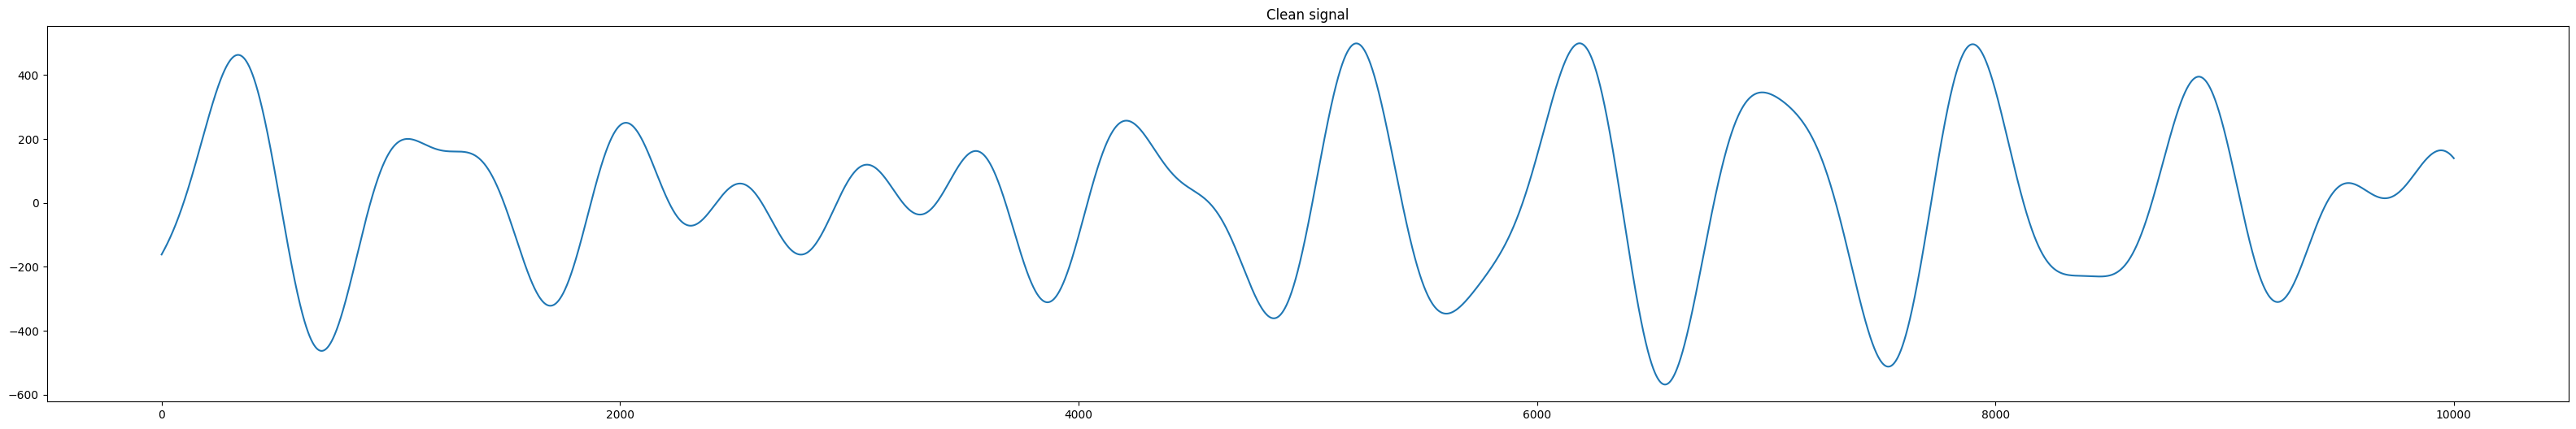

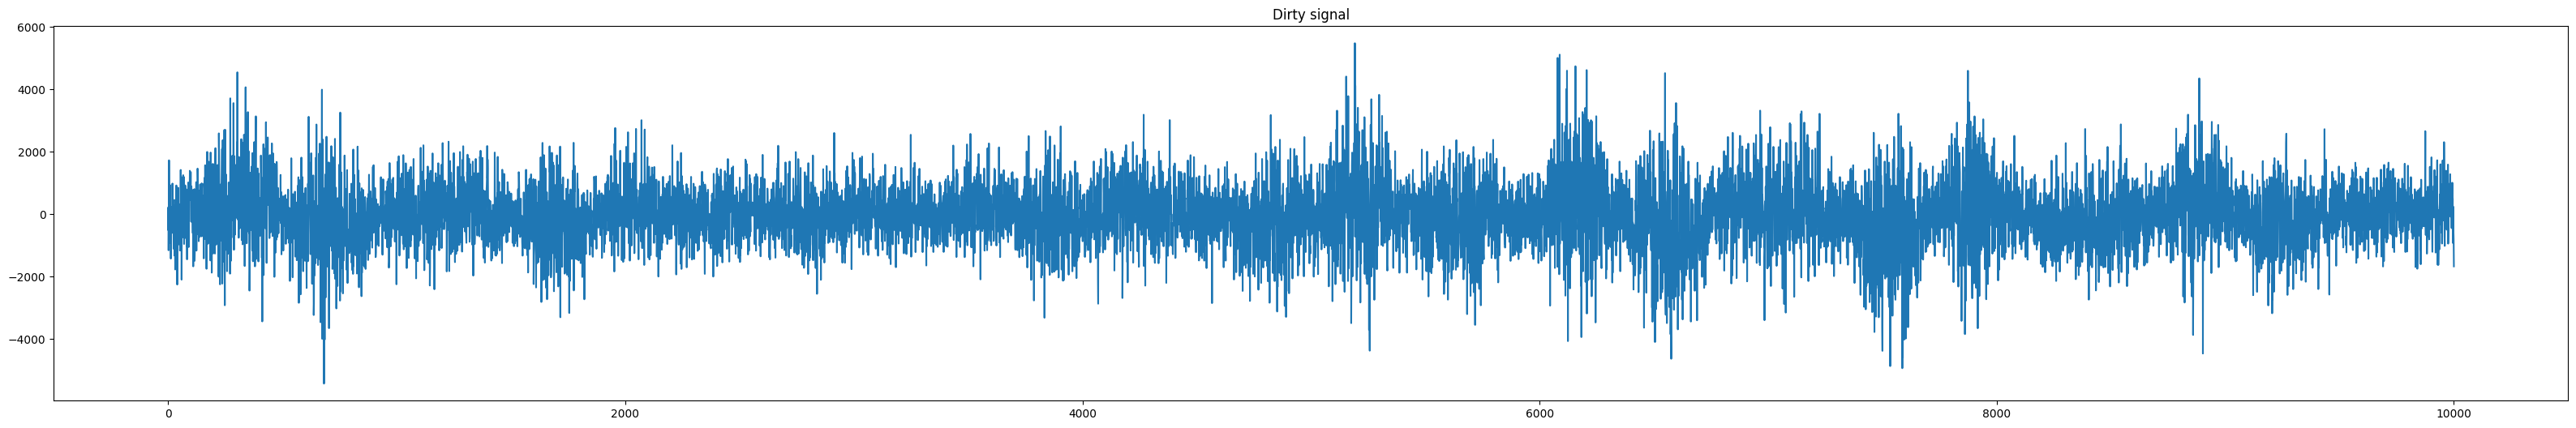

In [53]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label
plt.figure(figsize=(40, 6))
plt.plot(t, h)
plt.title("Clean signal")
plt.show()

plt.figure(figsize=(40, 6))
plt.plot(t, h_w_noise)
plt.title("Dirty signal")
plt.show()

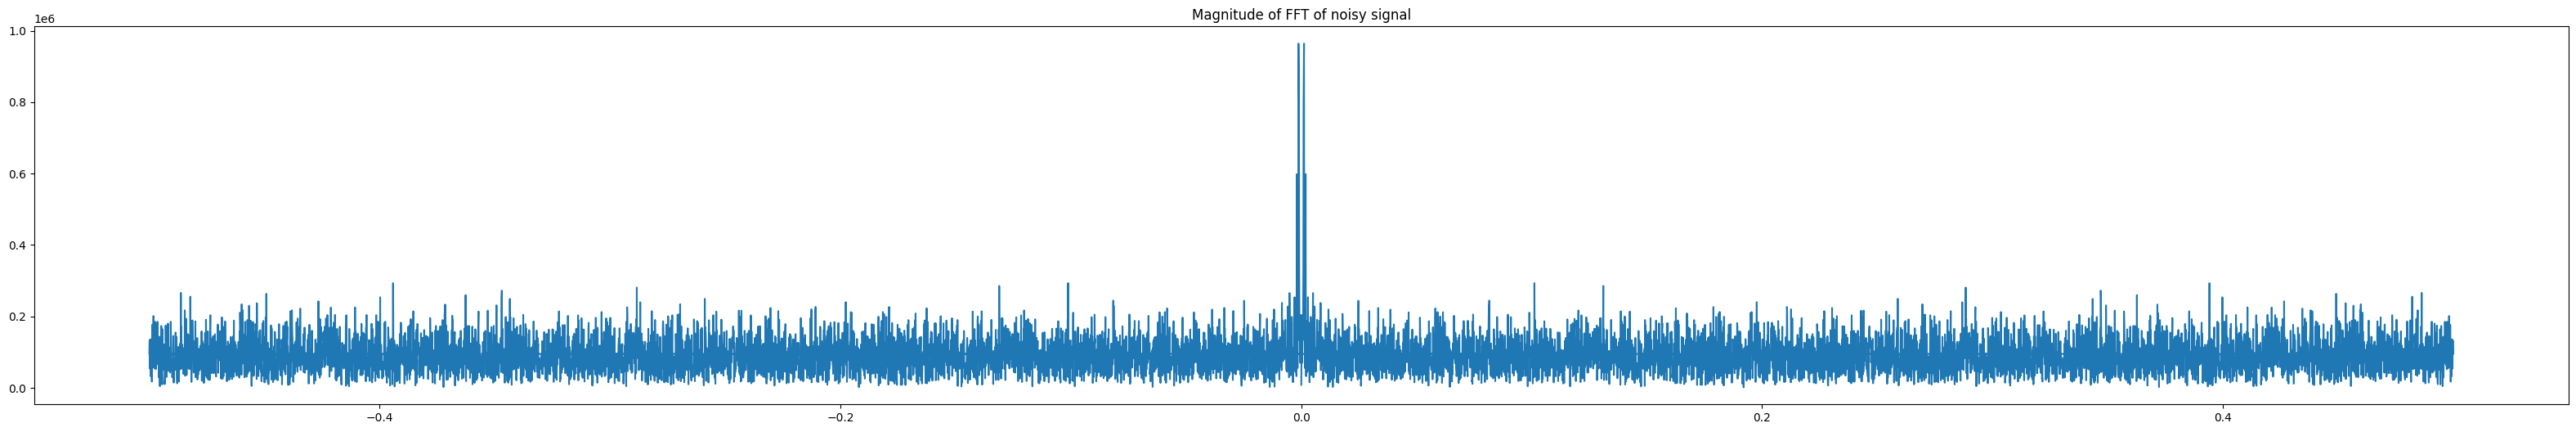

In [54]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)

fft_noise = np.fft.fft(h_w_noise)
amp_fft_noise = np.abs(fft_noise)
freq = np.fft.fftfreq(len(h_w_noise))

plt.figure(figsize=(40, 6))
plt.title("Magnitude of FFT of noisy signal")
plt.plot(freq, amp_fft_noise)
plt.show();

In [56]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT

threshold = 0.008
signal_fft_filtered = fft_noise * (np.abs(freq) < threshold)
filtered_signal = np.fft.ifft(signal_fft_filtered)

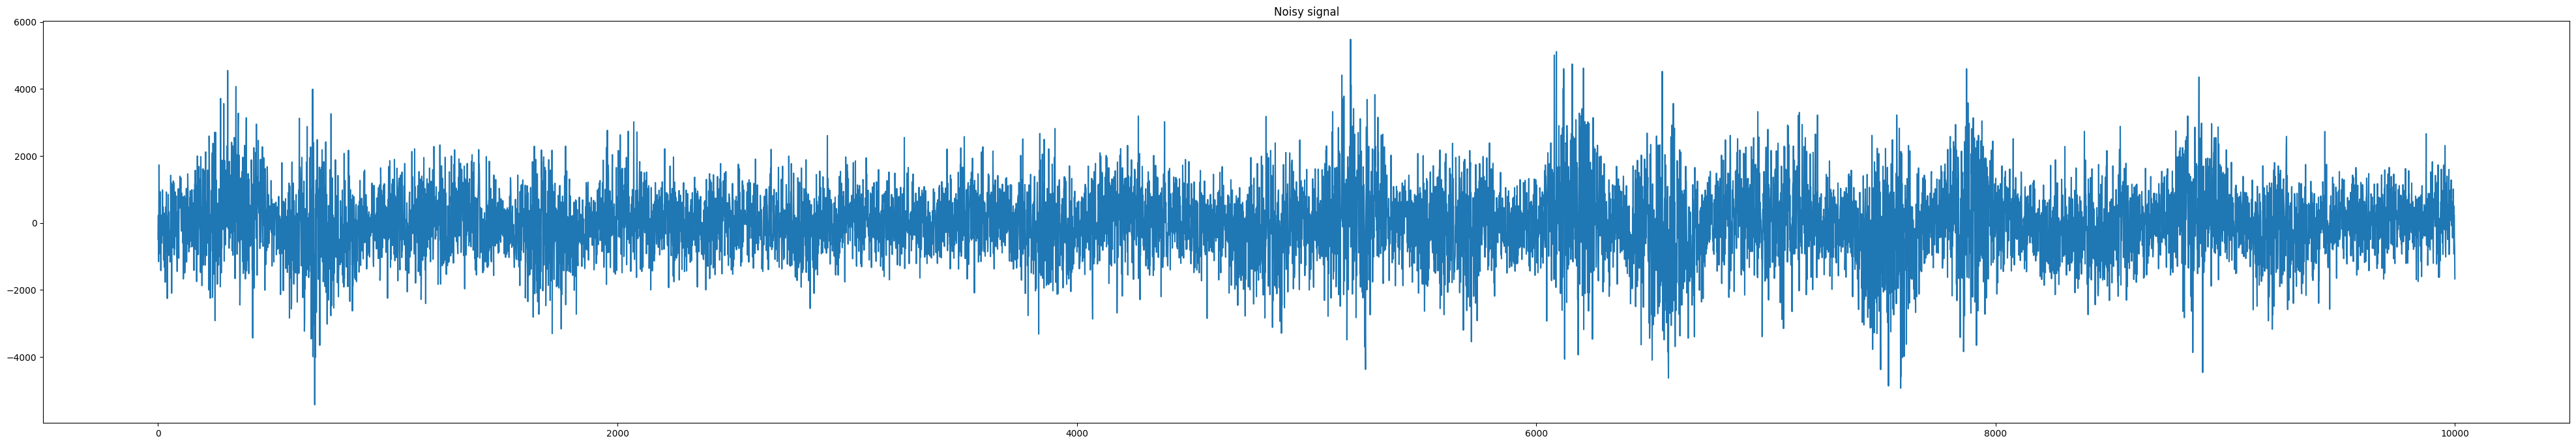

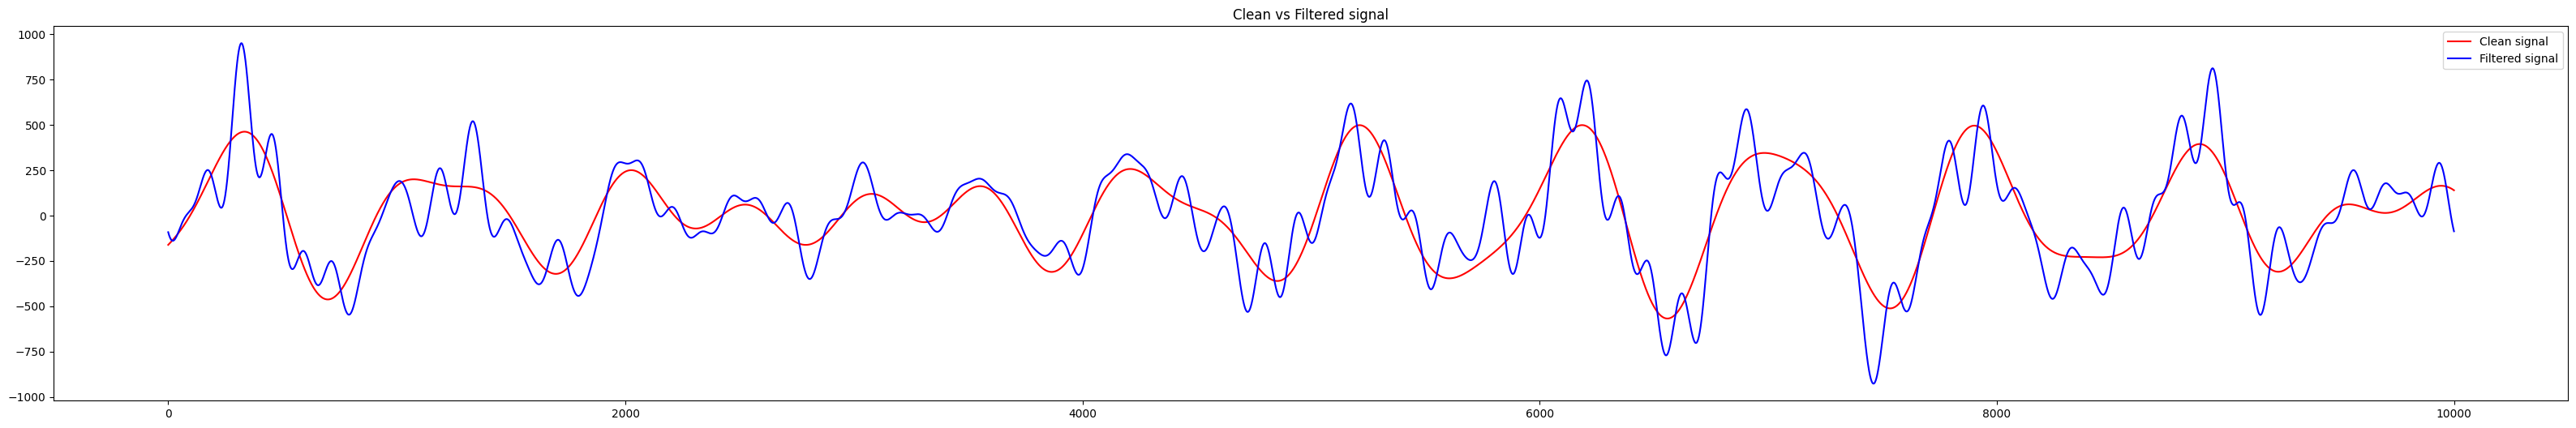

In [58]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 3.3) with label

plt.figure(figsize=(50, 8))
plt.title("NoisySignal")
plt.plot(t, h_w_noise)
plt.show()

plt.figure(figsize=(40, 6))
plt.plot(t, h, "r", label="CleanSignal")
plt.legend()

plt.plot(t, filtered_signal, "b", label="Filteredsignal")
plt.legend()
plt.title("Clean vs Filtered signal")
plt.show()


In [59]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered
ipd.Audio(data=h, rate=sampling_rate)

In [60]:
ipd.Audio(data=h_w_noise, rate=sampling_rate)

In [61]:
ipd.Audio(data=filtered_signal, rate=sampling_rate)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
# TODO 1.6 : Write to explain and analyze the results

# When we examine the signal and listen to the audio, we can see that the outcome resembles the original signal in certain aspects, but it's not an exact match.

# To make the signal cleaner and more similar to the original, we took steps to reduce the unwanted noise. This involved removing the high-frequency parts of the signal that went beyond a certain limit. As a result, the signal became clearer and started to resemble the original more closely.

# However, it's important to note that during this process, some of the original information got lost. This happened because the noise that was initially added to the signal was quite strong. In essence, while we improved the signal quality by reducing noise, there was a trade-off, and we sacrificed some of the original data due to the intensity of the added noise.

## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

In [22]:
!wget -O hamtaro.png https://i.ibb.co/JBTVZ66/hamtaro.png

--2023-09-21 08:00:46--  https://i.ibb.co/JBTVZ66/hamtaro.png
Resolving i.ibb.co (i.ibb.co)... 104.243.38.202, 104.243.38.177
Connecting to i.ibb.co (i.ibb.co)|104.243.38.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1484565 (1.4M) [image/png]
Saving to: ‘hamtaro.png’

hamtaro.png         100%[===================>]   1.42M  4.54MB/s    in 0.3s    

2023-09-21 08:00:47 (4.54 MB/s) - ‘hamtaro.png’ saved [1484565/1484565]



(1000, 1000)


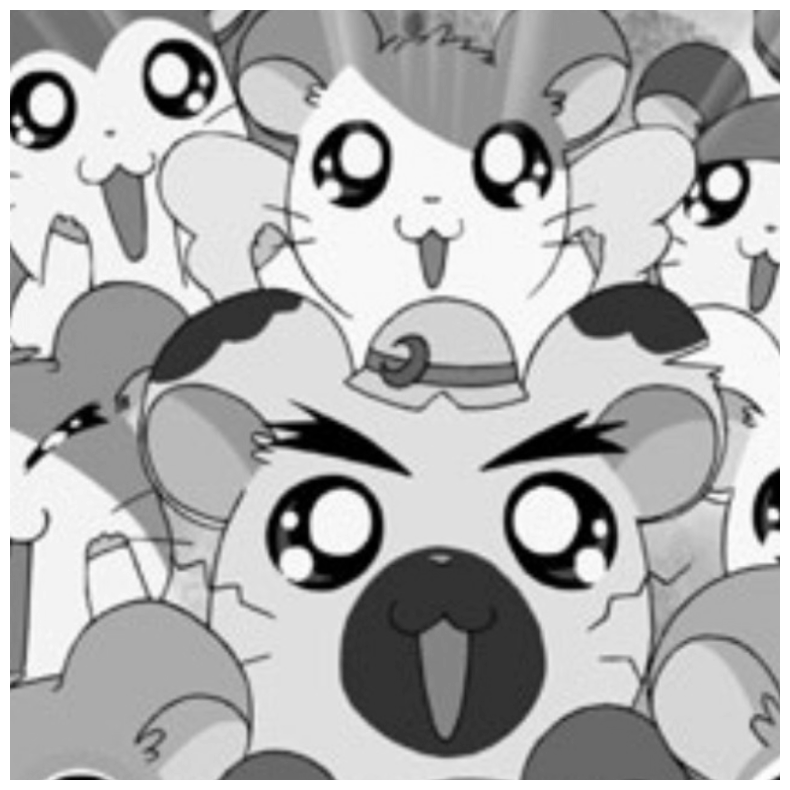

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load the image with OpenCV
screen_shot = cv2.imread('hamtaro.png')

# Convert the image to RGB format (Matplotlib expects images in RGB)
screen_shot_rgb = cv2.cvtColor(screen_shot, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(screen_shot_rgb ,cv2.COLOR_RGB2GRAY)
# Display the image using Matplotlib
print(img_gray.shape)
plt.figure(figsize=(10, 10))
plt.imshow(img_gray,cmap= "gray")
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

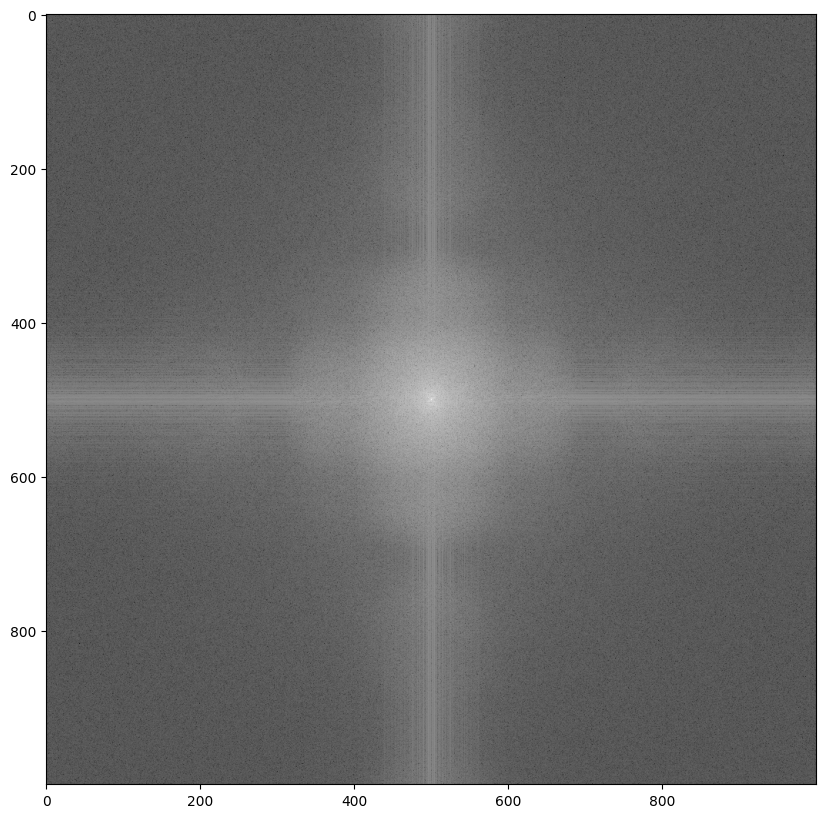

(1000, 1000)


In [37]:
# Apply FFT to the given image
F1 = fftpack.fft2((img_gray).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()
print(F2.shape)

In [ ]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image

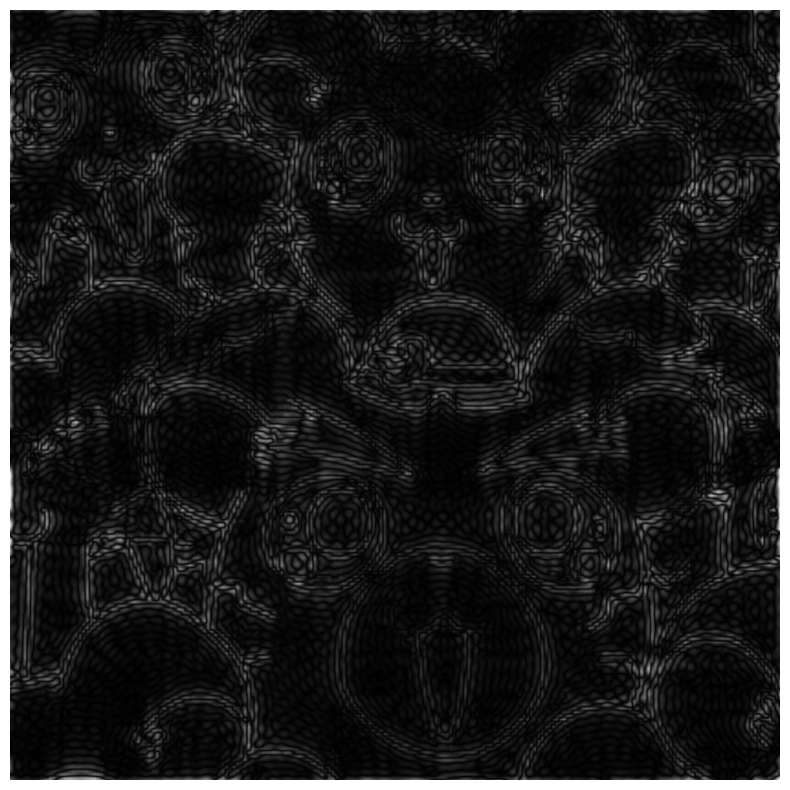

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Load the image with OpenCV
screen_shot = cv2.imread('hamtaro.png')

# Convert the image to grayscale
img_gray = cv2.cvtColor(screen_shot, cv2.COLOR_BGR2GRAY)

# Define the size of the input image and the size of the high-pass filter
image_size = img_gray.shape
filter_size = (100, 100)

# Create the ideal high-pass filter in the frequency domain
high_pass_filter = np.ones(image_size)
center_x, center_y = image_size[1] // 2, image_size[0] // 2
high_pass_filter[center_y - filter_size[0] // 2:center_y + filter_size[0] // 2,
                 center_x - filter_size[1] // 2:center_x + filter_size[1] // 2] = 0

# Perform FFT on the input image
img_fft = fft2(img_gray)

# Shift the filter to match the FFT dimensions
high_pass_filter = fftshift(high_pass_filter)

# Apply the high-pass filter in the frequency domain
filtered_fft = img_fft * high_pass_filter

# Perform inverse FFT to obtain the filtered image in the time domain
filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

# Visualize the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()


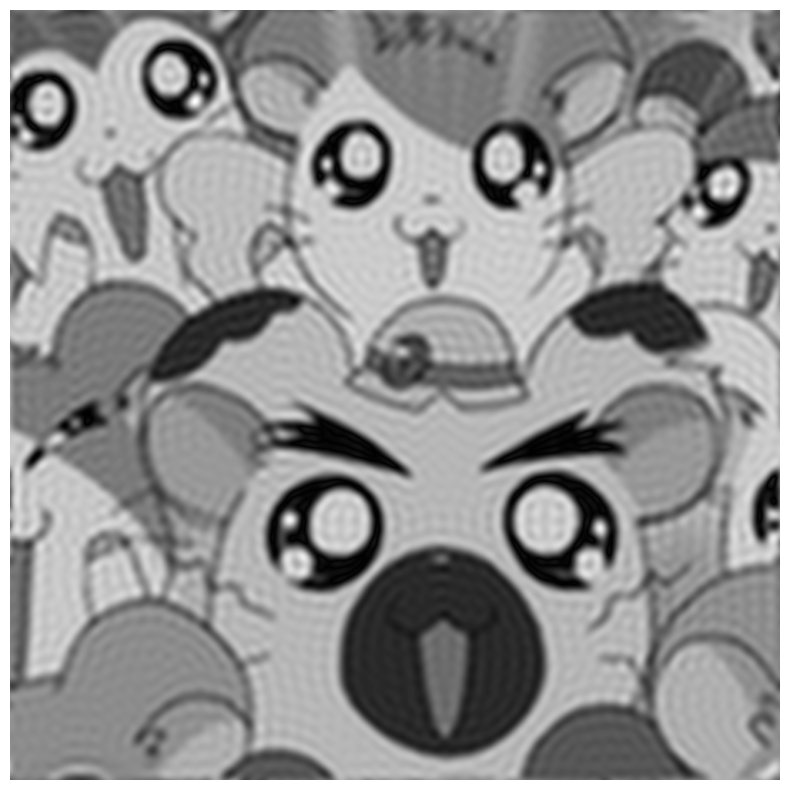

In [46]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image
low_pass_filter = 1 - high_pass_filter
# Apply the high-pass filter in the frequency domain
filtered_fft = img_fft * low_pass_filter

# Perform inverse FFT to obtain the filtered image in the time domain
filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

# Visualize the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

In [ ]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



In [ ]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [ ]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [ ]:
x02_ts02

In [ ]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [ ]:
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav